# Hotel Cancellation Prediction

## Exploratory Data Analysis:


Goal: Explore the data relationships of all your features and understand how the
features compare to the response variable.

* Build data profiles and tables 
    * Inference statistics
* Explore data relationships
    * Data visulization
* Feature Selection and Engineering

In [2]:
# import necessary packages and load dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import datetime

In [3]:
df = pd.read_csv('../data/hotel_data_cleaned.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day,reservation_status_day_of_week,arrival_date_day_of_week
0,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015,7,2,Thursday,Wednesday
1,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015,7,2,Thursday,Wednesday
2,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015,7,3,Friday,Wednesday
3,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015,7,3,Friday,Wednesday
4,Resort Hotel,0,0,2015,7,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015,7,3,Friday,Wednesday


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116951 entries, 0 to 116950
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           116951 non-null  object 
 1   is_canceled                     116951 non-null  int64  
 2   lead_time                       116951 non-null  int64  
 3   arrival_date_year               116951 non-null  int64  
 4   arrival_date_month              116951 non-null  int64  
 5   arrival_date_week_number        116951 non-null  int64  
 6   arrival_date_day                116951 non-null  int64  
 7   stays_in_weekend_nights         116951 non-null  int64  
 8   stays_in_week_nights            116951 non-null  int64  
 9   adults                          116951 non-null  int64  
 10  children                        116951 non-null  float64
 11  babies                          116951 non-null  int64  
 12  meal            

In [6]:
# Descriptive Statistics 

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
count,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,...,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000,116951.000000
mean,0.374610,105.188130,2016.161153,6.545707,27.135476,15.806680,0.935358,2.519517,1.861831,0.104223,...,0.125258,0.215193,75.222529,2.345367,103.863971,0.062607,0.571718,2016.097092,6.325529,15.669084
std,0.484024,106.924572,0.706264,3.082002,13.569353,8.782467,0.993030,1.885362,0.480757,0.398829,...,1.448456,0.630094,107.269630,17.710354,46.422812,0.245517,0.791880,0.714610,3.342145,8.781946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,0.000000,19.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,7.000000,0.000000,71.100000,0.000000,0.000000,2016.000000,3.000000,8.000000
50%,0.000000,71.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000,2016.000000,6.000000,16.000000
75%,1.000000,162.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,154.000000,0.000000,126.000000,0.000000,1.000000,2017.000000,9.000000,23.000000
max,1.000000,709.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,...,72.000000,18.000000,535.000000,391.000000,510.000000,8.000000,5.000000,2017.000000,12.000000,31.000000


In [7]:
df[['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children',
    'babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
    'booking_changes','days_in_waiting_list','adr','required_car_parking_spaces',
    'total_of_special_requests']].describe().T



,count,mean,std,min,25%,50%,75%,max
lead_time,116951.0,105.188130,106.924572,0.0,19.0,71.0,162.0,709.0
stays_in_weekend_nights,116951.0,0.935358,0.993030,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,116951.0,2.519517,1.885362,0.0,1.0,2.0,3.0,50.0
adults,116951.0,1.861831,0.480757,0.0,2.0,2.0,2.0,4.0
children,116951.0,0.104223,0.398829,0.0,0.0,0.0,0.0,10.0
babies,116951.0,0.007867,0.097193,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,116951.0,0.027730,0.164198,0.0,0.0,0.0,0.0,1.0
previous_cancellations,116951.0,0.081906,0.777167,0.0,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,116951.0,0.125258,1.448456,0.0,0.0,0.0,0.0,72.0
booking_changes,116951.0,0.215193,0.630094,0.0,0.0,0.0,0.0,18.0


## Data Visualization

<AxesSubplot:>

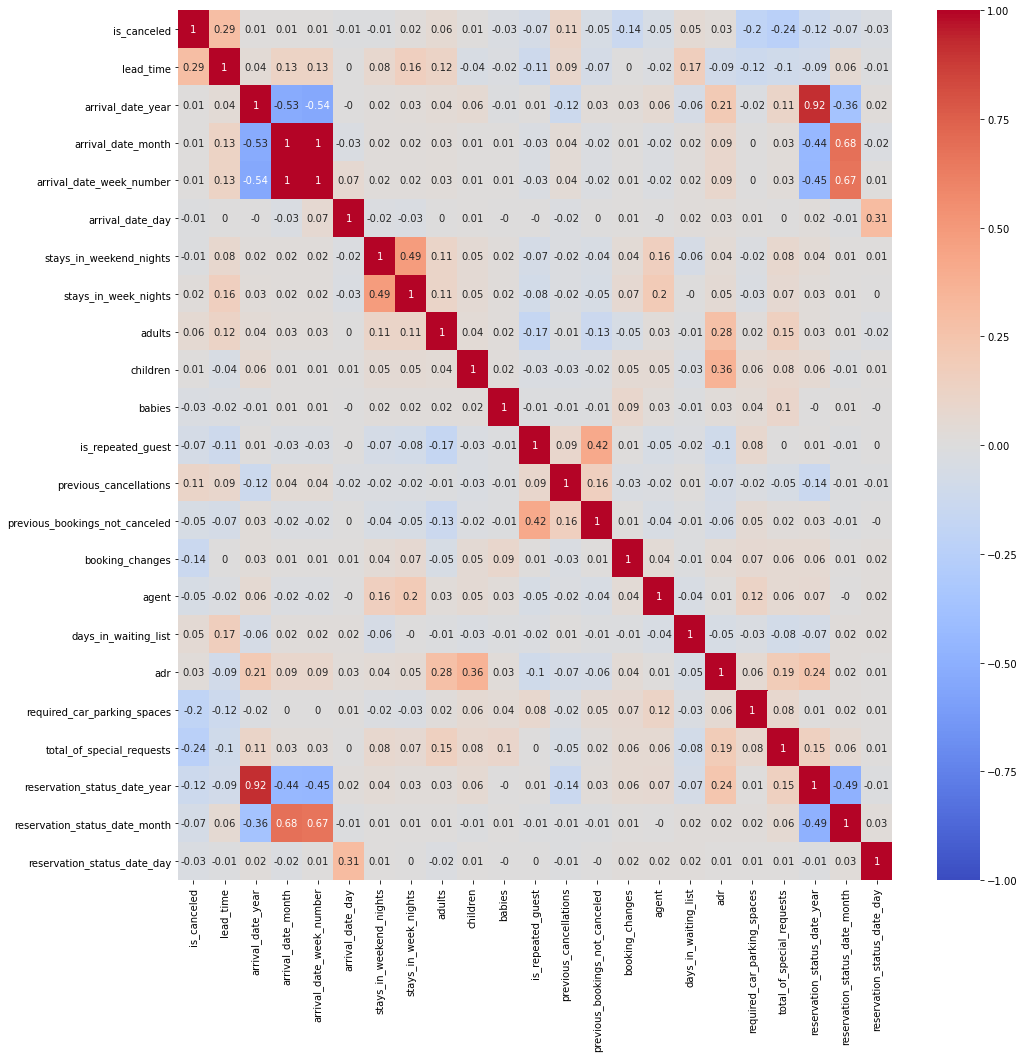

In [19]:
# heatmap
plt.figure(figsize = (16,16))
sns.heatmap(np.round(df.corr(),2), annot = True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

In [8]:
df_corr = df.corr()

In [9]:
# adr correlation 

(df_corr['adr']).sort_values(ascending = False)

adr                               1.000000
children                          0.359016
adults                            0.283715
reservation_status_date_year      0.241851
arrival_date_year                 0.205934
total_of_special_requests         0.191431
arrival_date_month                0.094366
arrival_date_week_number          0.090295
required_car_parking_spaces       0.062318
stays_in_week_nights              0.050996
booking_changes                   0.042034
stays_in_weekend_nights           0.038278
babies                            0.034499
is_canceled                       0.031942
arrival_date_day                  0.030470
reservation_status_date_month     0.019034
reservation_status_date_day       0.012346
agent                             0.010898
days_in_waiting_list             -0.047832
previous_bookings_not_canceled   -0.064482
previous_cancellations           -0.065267
lead_time                        -0.093863
is_repeated_guest                -0.102725
Name: adr, 

ADR has high correlation with children, adults, total_of_special_requests. Having more people (adults and children) and special orders increases daily rate. 

In [10]:
# cancellation correlation

(df_corr['is_canceled']).sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.290984
previous_cancellations            0.112532
adults                            0.056233
days_in_waiting_list              0.054299
adr                               0.031942
stays_in_week_nights              0.018360
arrival_date_year                 0.014976
arrival_date_month                0.012106
arrival_date_week_number          0.009230
children                          0.005133
arrival_date_day                 -0.006138
stays_in_weekend_nights          -0.007151
babies                           -0.032652
reservation_status_date_day      -0.034236
agent                            -0.047818
previous_bookings_not_canceled   -0.054794
reservation_status_date_month    -0.068148
is_repeated_guest                -0.074221
reservation_status_date_year     -0.119963
booking_changes                  -0.144019
required_car_parking_spaces      -0.197360
total_of_special_requests        -0.236952
Name: is_ca

Cancellation has high correlation with lead_time, previous cancellations, waiting time until order confirmed, and adr. 

In [11]:
# Split the df by cancallation

df_c0 = df[df['is_canceled']==0]['adr'] # not canceled
df_c1 = df[df['is_canceled']==1]['adr'] # canceled

In [12]:
# count booking cancelled 

print('No cancellation reservation:', len(df_c0))
print('Cancellation reservation:', len(df_c1))

# percentage of booking cancelled
print ((len(df_c1)/len(df.adr))*100)

No cancellation reservation: 73140
Cancellation reservation: 43811
37.460987935118126


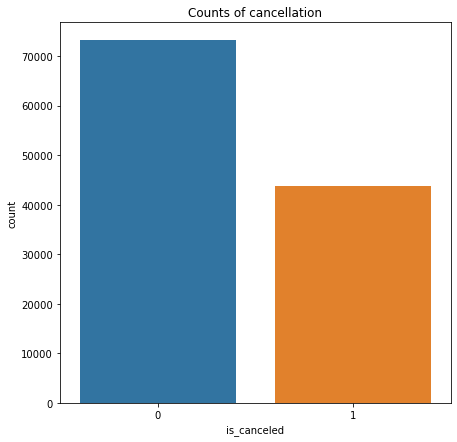

In [13]:
# Bar plot showing the number of cancelled vs not cancelled reservations

plt.figure(figsize = (7,7))
sns.countplot(x ='is_canceled', data = df)
plt.title('Counts of cancellation');

<Figure size 1080x720 with 0 Axes>

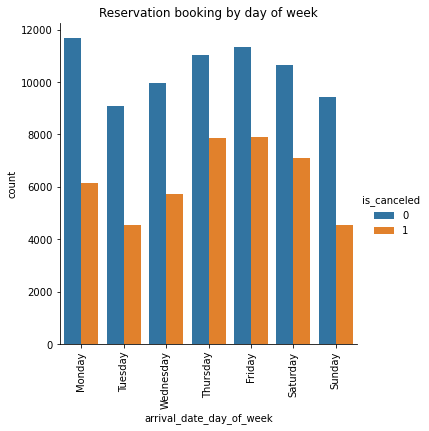

In [14]:
# Bookings by day of week

plt.figure(figsize=(15,10))

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.catplot(x='arrival_date_day_of_week', data = df, kind = 'count', hue = 'is_canceled', order=order)
plt.xticks(rotation=90)
plt.title('Reservation booking by day of week');


In [15]:
# looking into reservation_status values

df['reservation_status'].value_counts()

Check-Out    73140
Canceled     42635
No-Show       1176
Name: reservation_status, dtype: int64

In [16]:
df.loc[df['reservation_status']=='Check-Out', 'is_canceled'].value_counts()

0    73140
Name: is_canceled, dtype: int64

In [17]:
# How long should I book early to get cheaper daily average rates?


## Statistics Inference 

**Null Hypothesis**: The average daily rate price (ADR) booked by who has cancelled the reservation has the same rate as people who is not cancelled.

**Alternative Hypothesis**: The average daily rate price (ADR) booked by who has cancelled the reservation does NOt have the same rate as people who is not cancelled.

Text(0, 0.5, 'counts')

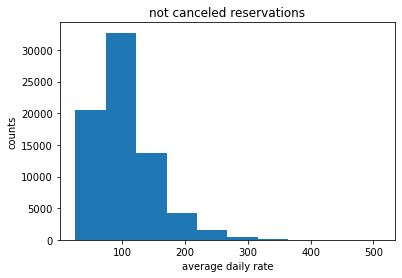

In [18]:
# not canceled average daily rate (price) histogram

plt.hist(df_c0)

plt.title ('not canceled reservations')
plt.xlabel ('average daily rate')
plt.ylabel ('counts')

Text(0, 0.5, 'counts')

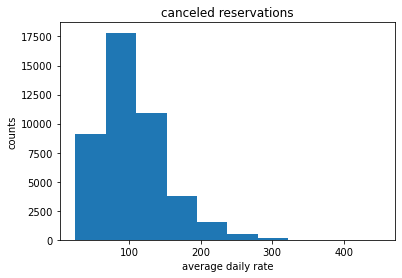

In [19]:
# canceled average daily rate (price) histogram

plt.hist(df_c1)

plt.title ('canceled reservations')
plt.xlabel ('average daily rate')
plt.ylabel ('counts')

compute variance of two sample for adr , whether they are equal or not, if equal set to True , False otherwise



In [20]:
# Checking variances of two samples whether they are equal or not.

s0 = np.var(df_c0)
s1 = np.var(df_c1)

print('not canceled reservation sample variance:', s0)
print('canceled reservation sample variance:', s1)
print('The variances between two samples are not equal, therefore equal_var = False')

not canceled reservation sample variance: 2211.4925941687825
canceled reservation sample variance: 2054.9766719028694
The variances between two samples are not equal, therefore equal_var = False


In [21]:
ttest_ind(df_c1, df_c0, equal_var=False)

Ttest_indResult(statistic=11.030208120075132, pvalue=2.8427140538857988e-28)

The p-value is lower than 0.05 (standard alpha value, significance level). Therefore, we can reject the null hypothesis and accept alternative hypothesis. 
**The average daily rate (ADR) between two groups (who has cancelled and not cancelled the reservation) are different.**

## Bootstrapping

The shape of histogram follows normal distribution trends however, they are slightly skewed to the right. I am going to use bootstrapping method to check my t-test results.

**Null Hypothesis**: The average daily rate price (ADR) booked by who has cancelled the reservation has the same rate as people who is not cancelled.

**Alternative Hypothesis**: The average daily rate price (ADR) booked by who has cancelled the reservation does NOT have the same rate as people who is not cancelled.

In [22]:
difference = list()

# For loop that does the following 10,000 times:
# 1. makes a permutation of the 'adr'
# 2. calculates the difference in the mean adr for canceled and the mean adr for not canceled. 

for i in range(10000):
    permutation = np.random.permutation(df['adr'])
    difference.append(np.mean(permutation[df['is_canceled']==0]) - np.mean(permutation[df['is_canceled']==1]))

In [23]:
empirical_diff = abs(np.mean(df_c0)-np.mean(df_c1))

In [24]:
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= empirical_diff):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -empirical_diff):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))

p = (len(positiveExtremes)+len(negativeExtremes))/len(difference)

print (p)

0
0
0.0


P value = 0, very significant evidence that the prices are different between two groups.